In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
tot_episodes = 1000
learning_steps = 20
time_steps = 10000
epsilon_rate = 0.995
gamma = 0.99
alpha_0 = 0.8
L = 50
N = 150
v0 = 20
tot_states = 5
tot_actions = 2
a = 1.66
pred_pos = np.array([0.0,0.0])
D0 = 1
tau_r = (1.10688**2/(3*D0))
dt = 1.5e-5

* 5 States in total
* State 0 is near the predator and state 4 is farthest from the predator
* Action :
*     0 -> passive diffusion
*     1 -> active diffusion

In [3]:
bin_size = L/(2*tot_states)
bin_ranges = np.linspace(0, L/2, tot_states+1)

In [4]:
def dist_to_state(r):
    return np.minimum((r//bin_size).astype(int), tot_states-1)

In [5]:
Q_matrix = np.ones((tot_states , tot_actions))

In [6]:
Q_matrix

array([[1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.]])

In [7]:
avg_rewards = np.zeros(tot_episodes)

In [8]:
for ep in range(tot_episodes):

    eps = epsilon_rate**(ep)
    alpha = alpha_0/(alpha_0 + ep)
    
    pos = (np.random.rand(N,2) - 0.5)*L
    phi = np.random.rand(N) * 2*np.pi
    
    r = np.linalg.norm(pos, axis=1)
    close_indices = np.where(r < a)[0]
    n_reset = len(close_indices)
        
    while n_reset > 0:
            
        new_pos = (np.random.rand(n_reset, 2) - 0.5) * L

        new_phi = np.random.rand(n_reset) * 2 * np.pi

        pos[close_indices] = new_pos
        phi[close_indices] = new_phi
            
        r = np.linalg.norm(pos, axis=1)
            
        close_indices = np.where(r < a)[0]

        n_reset = len(close_indices)
    
    for step in range(learning_steps):
        rel = pos - pred_pos
        r = np.linalg.norm(rel,axis = 1)
        s = dist_to_state(r)
        
        best = np.argmax(Q_matrix[s] , axis = 1)
        rand = np.random.rand(N)
        a = np.where(rand < (1-eps) , best , np.random.randint(0,tot_actions,N))
        
        for _ in range(time_steps):
            
            phi += np.sqrt(2*dt/tau_r)*np.random.randn(N)
            
            direction_vectors = np.vstack((np.cos(phi) , np.sin(phi))).T
            
            v = direction_vectors * a[:,None] * v0
            
            
            pos += v*dt + np.sqrt(2*D0*dt)*np.random.randn(N,2)
            pos = ((pos + L/2) % L) - L/2
            
            
            r = np.linalg.norm(pos, axis=1)
            close_indices = np.where(r < a)[0]
            n_reset = len(close_indices)
        
            while n_reset > 0:
            
                new_pos = (np.random.rand(n_reset, 2) - 0.5) * L

                new_phi = np.random.rand(n_reset) * 2 * np.pi

                pos[close_indices] = new_pos
                phi[close_indices] = new_phi
            
                r = np.linalg.norm(pos, axis=1)
            
                close_indices = np.where(r < a)[0]

                n_reset = len(close_indices)
        
        rel = pos - pred_pos
        r2 = np.sum(rel**2,axis = 1)
        reward = r2.copy()

        s2 = dist_to_state(np.sqrt(r2))
        
        q_next_max = Q_matrix[s2].max(axis = 1)
        for i in range(N):
            Q_matrix[s[i] , a[i]] += alpha*(reward[i] + gamma*(q_next_max[i]) - Q_matrix[s[i],a[i]])
        
    if ep%10 == 0:
        print(ep)
    avg_rewards[ep] = reward.mean()

0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
510
520
530
540
550
560
570
580
590
600
610
620
630
640
650
660
670
680
690
700
710
720
730
740
750
760
770
780
790
800
810
820
830
840
850
860
870
880
890
900
910
920
930
940
950
960
970
980
990


In [9]:
Q_matrix

array([[50142.56239554, 50478.20531291],
       [50224.41728942, 50469.54698253],
       [51979.4484728 , 52185.60337894],
       [54380.91595989, 54597.62247261],
       [55988.71238238, 55851.73566667]])

Text(0, 0.5, 'Rewards')

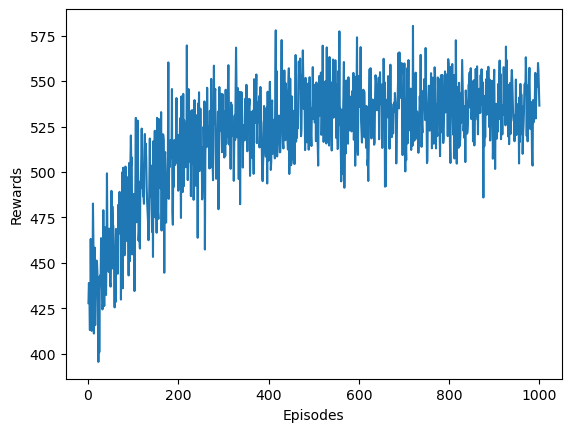

In [12]:
plt.plot(range(1,tot_episodes+1) , avg_rewards)
plt.xlabel('Episodes')
plt.ylabel('Rewards')

In [13]:
i = 0
for ele in Q_matrix:
    if ele[0] > ele[1]:
        print('State :' , i , 'Action :' , 'Passive')
    else:
        print('State :' , i , 'Action :' , 'Active')
    i += 1

State : 0 Action : Active
State : 1 Action : Active
State : 2 Action : Active
State : 3 Action : Active
State : 4 Action : Passive
